In [1]:
# importing pandas, numpy and matplotlib,seaborn,train_test_split,LabelEncoder,StandardScaler,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,accuracy_score,confusion_matrix,classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
# loading the titanic dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# droping the unnecessary columns
titanic.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
# filling the missing values
titanic["Age"].fillna(titanic["Age"].median(),inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

/tmp/ipykernel_7233/8304137.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(),inplace=True)
/tmp/ipykernel_7233/8304137.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [4]:
label = LabelEncoder()
titanic["Sex"] = label.fit_transform(titanic["Sex"])
titanic["Embarked"] = label.fit_transform(titanic["Embarked"])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [5]:
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# training multiple models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred))
    print("\n")

LogisticRegression()
Accuracy Score: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



DecisionTreeClassifier()
Accuracy Score: 0.7932960893854749
Confusion Matrix:
 [[85 20]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



RandomForestClassifier()
Accuracy Score: 0.8100558659217877
Confusion Matrix:
 [[89 16]
 [18 56]]
Clas

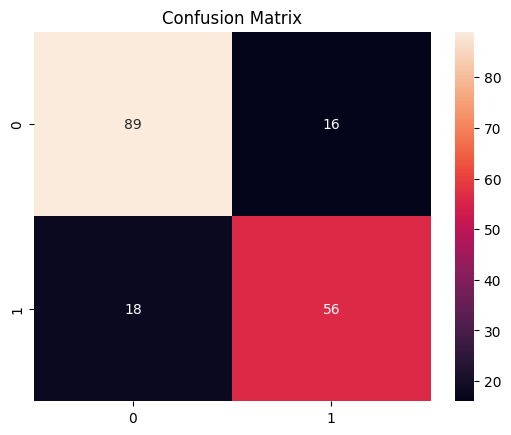

In [8]:
# visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title("Confusion Matrix")
plt.show()